**Social Network Analysis**

**SNA 기본라이브러리**
SNA는 보통 networkx 라이브러리를 활용하면 편리하게 분석할 수 있습니다.\
이 때 scipy모듈이 1.8버전 이하의 경우 몇몇 함수에서 syntax error가 나타날 수 있습니다. Anaconda나 Google Colab환경에서 scipy모듈의 디폴트 버전이 1.7.X인 경우가 많으니 반드시 버전을 확인하고 업데이트를 하여야 합니다. networkx도 2.8 이상 버전을 사용하는 것이 좋습니다. 모듈을 업데이트 한 후에는 반드시 런타임을 재시작합니다.

In [1]:
import scipy, networkx
print(scipy.__version__, networkx.__version__)
# !pip install --update scipy
# !pip install --update networkx

1.12.0 3.2.1


In [2]:
!pip install scipy

In [3]:
# !pip install networkx

In [4]:
import pandas as pd

PASSMAP데이터를 임포트합니다.\
PASSMAP데이터는 한 농구경기에서 선수들 간에 얼마나 많은 패스가 이루어졌는지 기록한 데이터입니다. Source는 패스를 준 선수, Target은 패스를 받은 선수를 의미합니다. weight는 패스의 수입니다. source: charles, target:michel, weight:6 이라하면 charles 선수가 micheal에게 6번의 패스를 줬다는 것을 의미합니다.\
주전선수 5명과 후보선수 7명을 합하여 총 12명의 선수가 이번 게임에 플레이하였습니다.

In [5]:

df = pd.read_csv('passmap.csv')
print(df)

     source   target  weight
0   charles     karl       1
1   charles    david       1
2   charles   reggie       1
3   charles    clyde       3
4   charles  michael       6
..      ...      ...     ...
73    shawn  charles       2
74    shawn    david       2
75    shawn  michael       3
76    shawn   hakeem       3
77    shawn     john       4

[78 rows x 3 columns]


In [6]:
df2 = pd.read_csv('passmap2.csv')
print(df2)

      source   target  weight
0       john    mitch       1
1    michael     karl       1
2    scottie    clyde       1
3    scottie   reggie       1
4    scottie     gary       1
..       ...      ...     ...
97   michael     john      22
98   michael  scottie      24
99      john  scottie      25
100     john   hakeem      27
101     john  michael      35

[102 rows x 3 columns]


In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

비어있는 그래프 객체를 정의합니다.\
undirected graph는 Graph로, directed graph는 DiGraph 함수를 이용합니다.

In [8]:
# undirected egdes
G = nx.Graph()
G.add_edges_from([(1, 2, {'weight': 5}), (2, 3, {'weight': 10}), (3, 4, {'weight': 15}), (1, 4, {'weight': 8}), (1,5, {'weight':4})])

In [9]:
print(G)

Graph with 5 nodes and 5 edges


<function matplotlib.pyplot.show(close=None, block=None)>

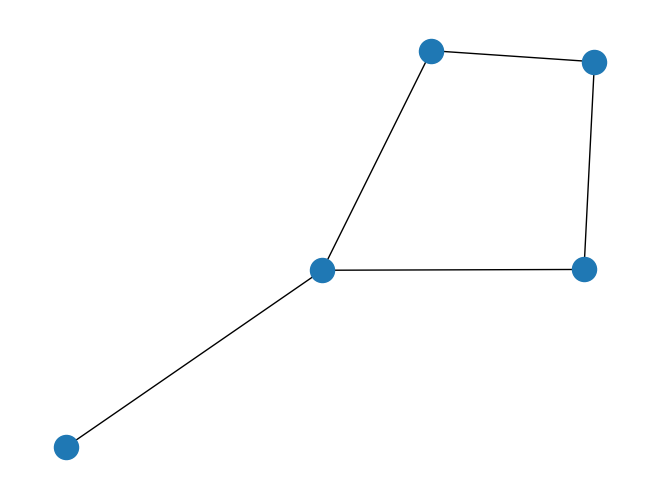

In [10]:
pos = nx.spring_layout(G)
nx.draw(G, pos)
plt.show

In [11]:
# define a directed graph object
g = nx.DiGraph()
g2 = nx.DiGraph()

그래프 객체에 노드를 추가합니다. source와 target에 있는 모든 노드 추가합니다.

In [12]:
g.add_nodes_from(df['source'])
g.add_nodes_from(df['target'])
print(g)
g2.add_nodes_from(df2['source'])
g2.add_nodes_from(df2['target'])
print(g2)

DiGraph with 12 nodes and 0 edges
DiGraph with 12 nodes and 0 edges


노드와 타겟어 맞춰 엣지의 웨이트를 추가합니다. indireced network의 경우 source와 target 의 구분이 의미없습니다. 그러나 direced 인 경우에는 각각 따로 할당하여야 합니다.\
passmap.csv에 있는 데이터를 다시 그래프 객체로 변환하면서 각각 source 와 target의 방향과 weight를 추가합니다. 이 때 add_edge함수를 적용합니다.

In [13]:
for i in range(len(df)):
  source = df.iloc[i]['source']
  target = df.iloc[i]['target']
  weight = df.iloc[i]['weight']
  g.add_edge(source, target, weight=weight)
print(g)
for i in range(len(df2)):
  source = df2.iloc[i]['source']
  target = df2.iloc[i]['target']
  weight = df2.iloc[i]['weight']
  g2.add_edge(source, target, weight=weight)
print(g2)


DiGraph with 12 nodes and 78 edges
DiGraph with 12 nodes and 102 edges


그래프 매트릭스를 생성하고 싶을 때는 adjacency_matrix함수를 사용합니다. 결과값은 numpy array로 출력됩니다.

In [14]:
adj_matrix = nx.adjacency_matrix(g)
print(adj_matrix.todense())
adj_matrix2 = nx.adjacency_matrix(g2)
print(adj_matrix2.todense())

[[ 0  3  1  0 10  8  1  6  1  8  0  0]
 [ 1  0  2  1  2  0  2  0  0  2  1  0]
 [ 1  1  0  0  0  1  0  2  1  2  0  0]
 [ 0  1  1  0  1  0  0  0  0  1  0  1]
 [ 4  1  0  0  0 12  0  6  2  5  0  0]
 [20  6 11  0 27  0  7 35  4 25  3  0]
 [ 0  1  1  0  2  2  0  3  1  1  0  0]
 [21  2  2  0 14 22  1  0  0 24  3  0]
 [ 2  0  0  0  2  2  1  0  0  1  1  0]
 [ 6  1  3  0 14  7  4 12  1  0  0  0]
 [ 2  1  2  0  3  4  0  3  1  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]]
[[ 0 35 25 20 27  7 11  6  3  4  0  1]
 [22  0 24 21 14  1  2  2  3  0  0  0]
 [ 7 12  0  6 14  4  3  1  0  1  1  1]
 [ 8  6  8  0 10  1  1  3  0  1  1  1]
 [12  6  5  4  0  0  0  1  0  2  2  1]
 [ 2  3  1  0  2  0  1  1  0  1  1  1]
 [ 1  2  2  1  0  0  0  1  0  1  2  1]
 [ 0  0  2  1  2  2  2  0  1  0  1  0]
 [ 4  3  2  2  3  0  2  1  0  1  1  0]
 [ 2  0  1  2  2  1  0  0  1  0  1  0]
 [ 0  4  3  5  6  2  2  1  2  1  0  0]
 [ 1  2  1  0  1  0  2  1  0  0  1  0]]


그래프를 시각화 해 봅니다.\
우선 노드의 배치 레이아웃을 설정해줍니다. spring layout은 가장 기본적인 형태로 노드간의 거리와 중요성을 계산하여 자동으로 배치합니다.\
이 외에도 다양한 layout이 있습니다.


<function matplotlib.pyplot.show(close=None, block=None)>

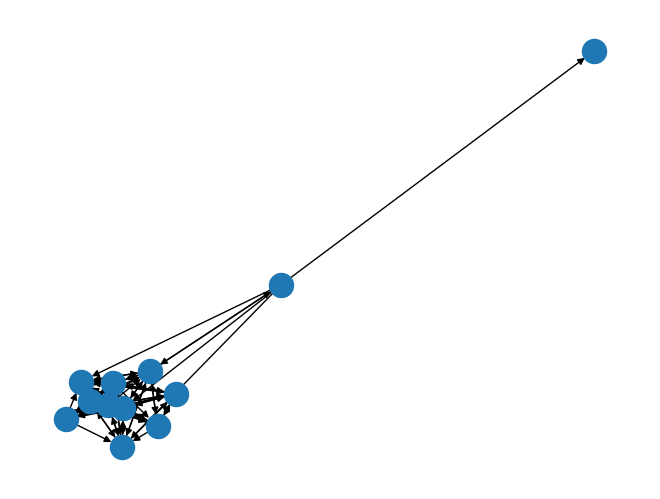

In [15]:
pos = nx.spring_layout(g)
nx.draw(g, pos)
plt.show

네트워크가 보기 좋지 않네요. 노드의 중요성에 따라 크기를 바꿔주고, 엣지의 굵기도 엣지웨이트에 따라 다르게 나타나는게 좋겠습니다. 우선 centrality로 노드의 크기를 정의하고, 엣지웨이트값으로 엣지의 굵기를 정의하겠습니다. centrality에 관해서는 뒤에 자세히 다루도록 하겠습니다.

In [16]:
centrality = nx.degree_centrality(g)
weights = [d['weight'] for (u, v, d) in g.edges(data=True)]
centrality2 = nx.degree_centrality(g2)
weights2 = [d['weight'] for (u, v, d) in g2.edges(data=True)]

네트워크 그림은 너무 작으면 보기가 어렵습니다. 크기를 크게 그릴수록 좋습니다. plt.figure 함수를 사용하여 그림의 사이즈를 조절해줍니다. \
엣지의 넓이는 엣지웨이트로 설정합니다.\
노드의 크기는 각 노드의 centrality를 기반으로 하되, 너무 크기가 작으면 보기 않좋으니 2000을 곱해줍니다.\
노드의 레이블은 그래프의 노드 이름을 사용합니다.

In [17]:
print(centrality)

{'charles': 1.4545454545454546, 'clyde': 1.4545454545454546, 'david': 1.2727272727272727, 'gary': 0.5454545454545454, 'hakeem': 1.3636363636363638, 'john': 1.5454545454545454, 'karl': 1.1818181818181819, 'michael': 1.3636363636363638, 'reggie': 1.1818181818181819, 'scottie': 1.6363636363636365, 'shawn': 1.0909090909090908, 'mitch': 0.09090909090909091}


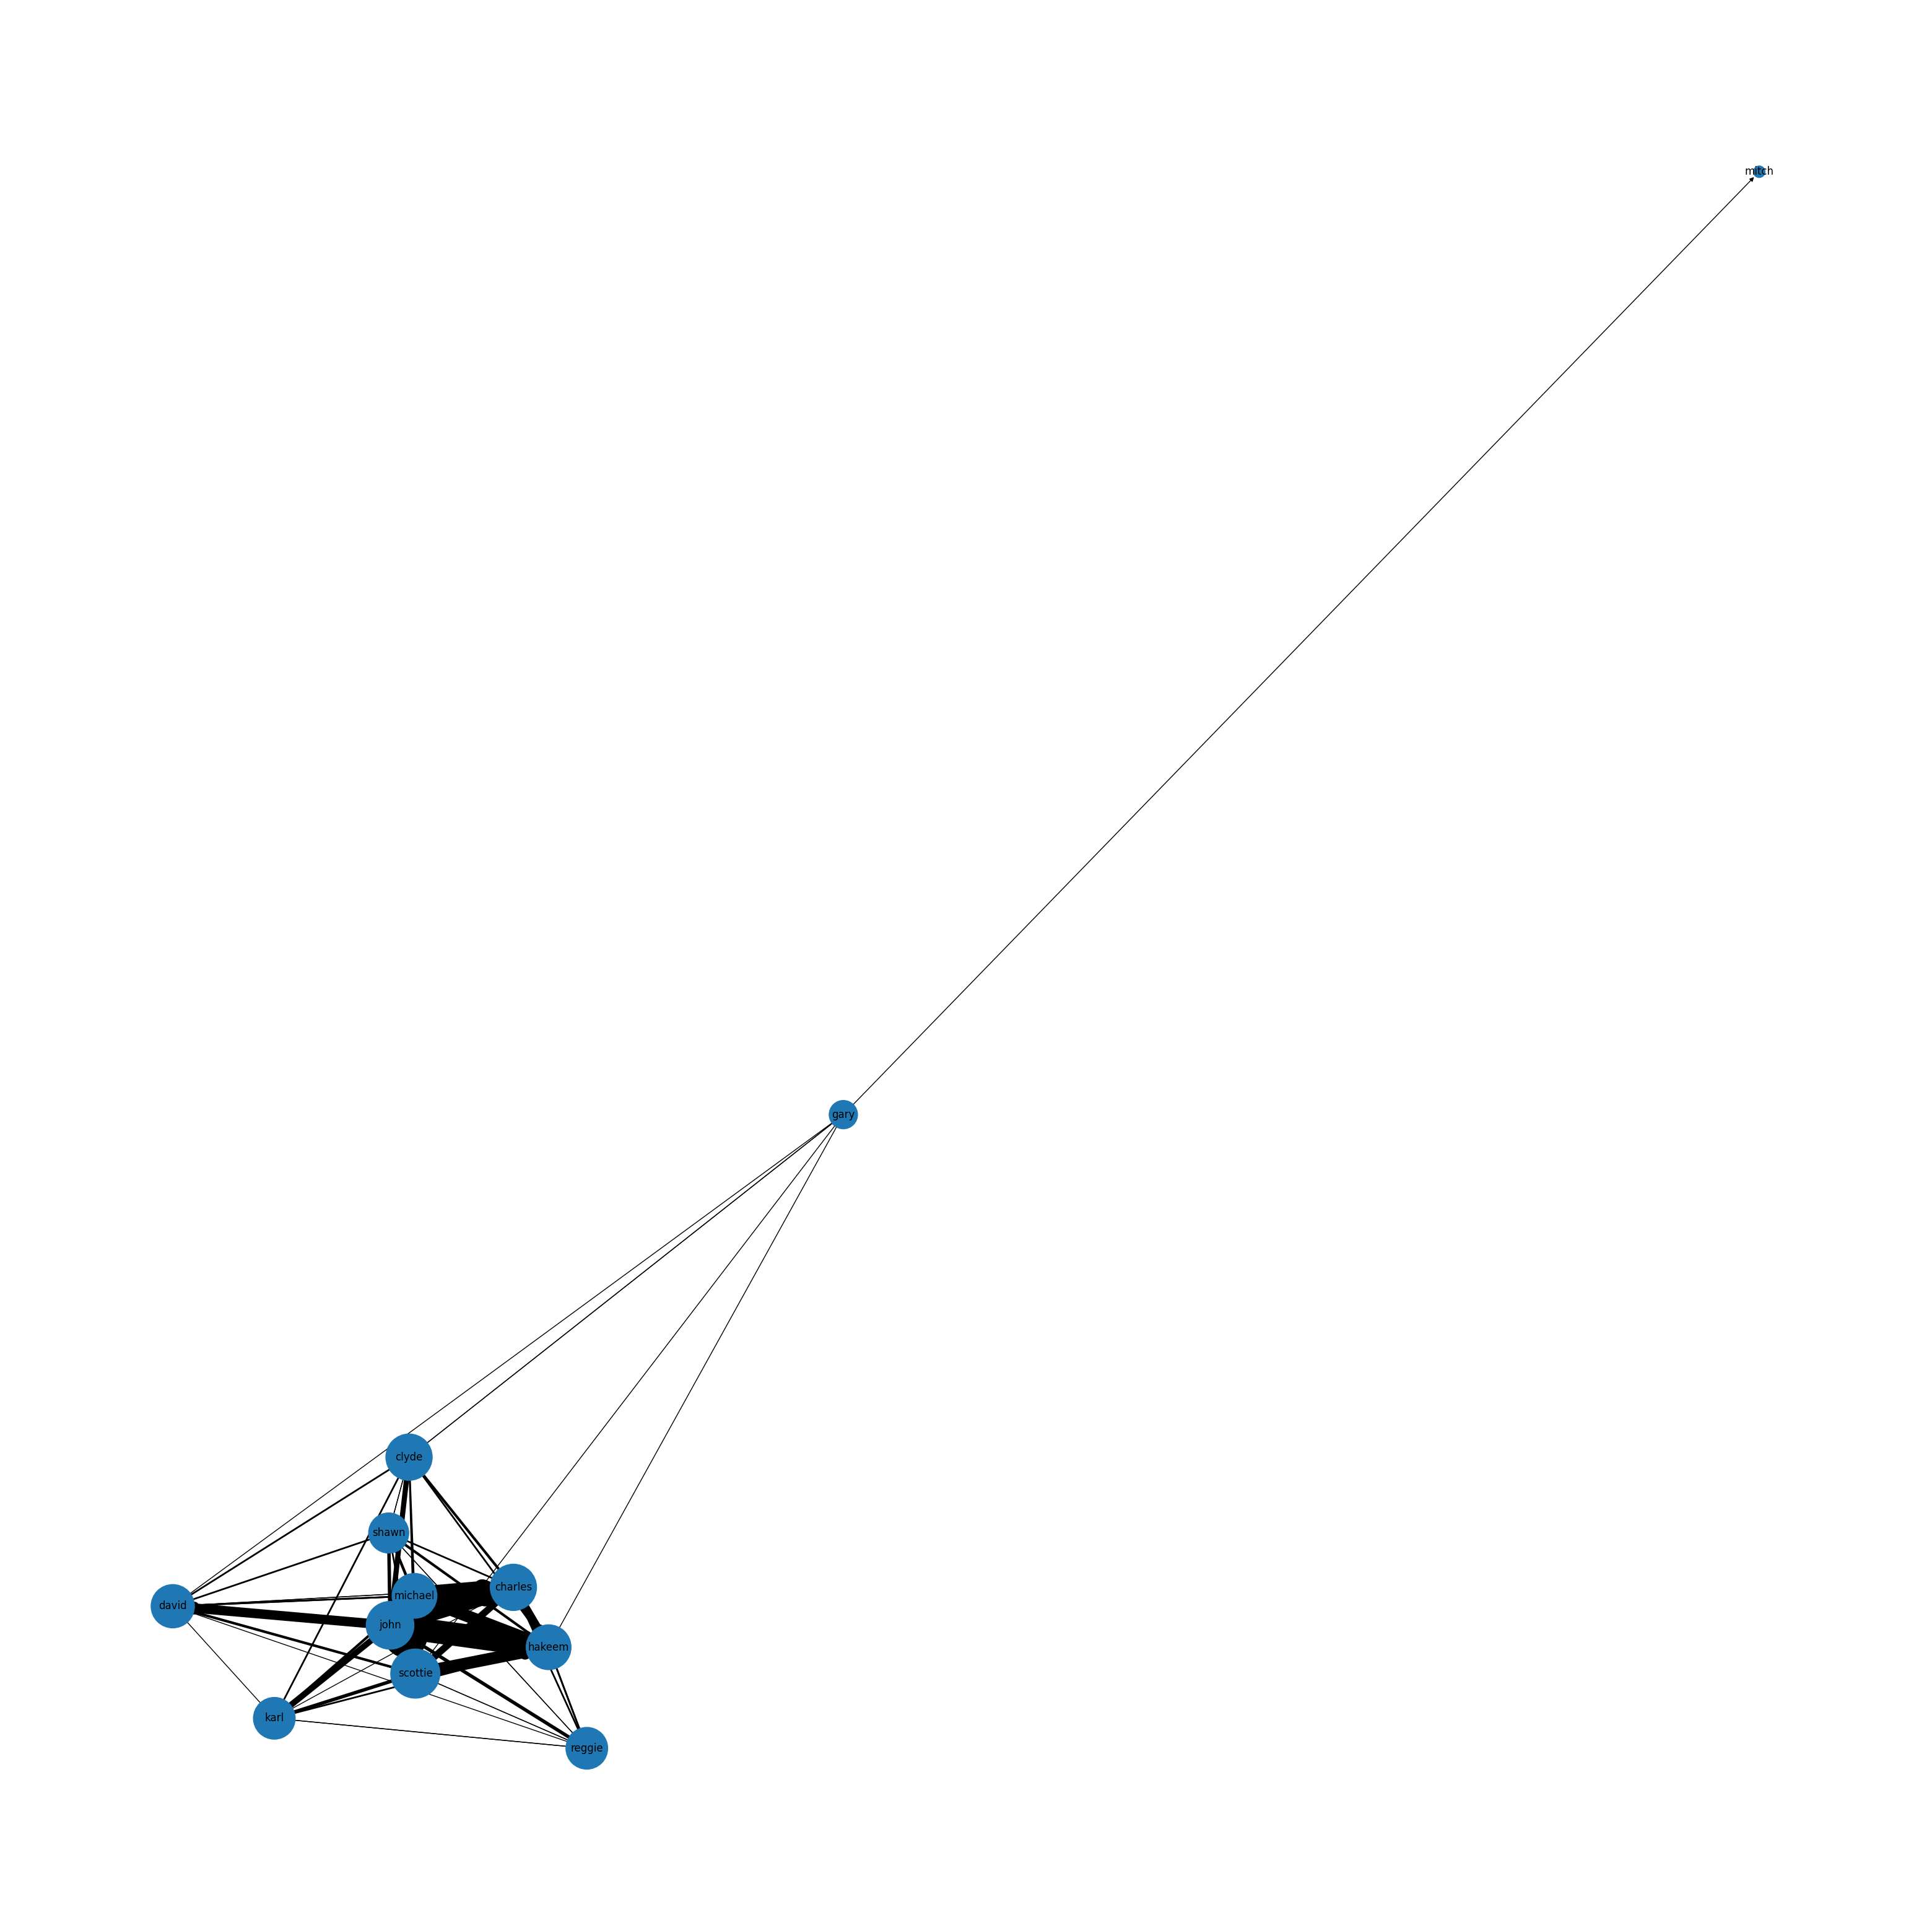

In [18]:
fig = plt.figure(figsize=(40,40))
fig.set_facecolor('white')
pos = nx.spring_layout(g)
nx.draw_networkx_edges(g, pos, width=weights)
nx.draw_networkx_nodes(g, pos, node_size=[centrality[n] * 2000 for n in g.nodes()])
nx.draw_networkx_labels(g, pos)
plt.axis('off')
plt.show()

노드의 색을 바꿔줍니다. centrality를 기준으로 그라데이션을 줘서 구분합니다. Red계열의 컬러맵을 사용하였습니다.

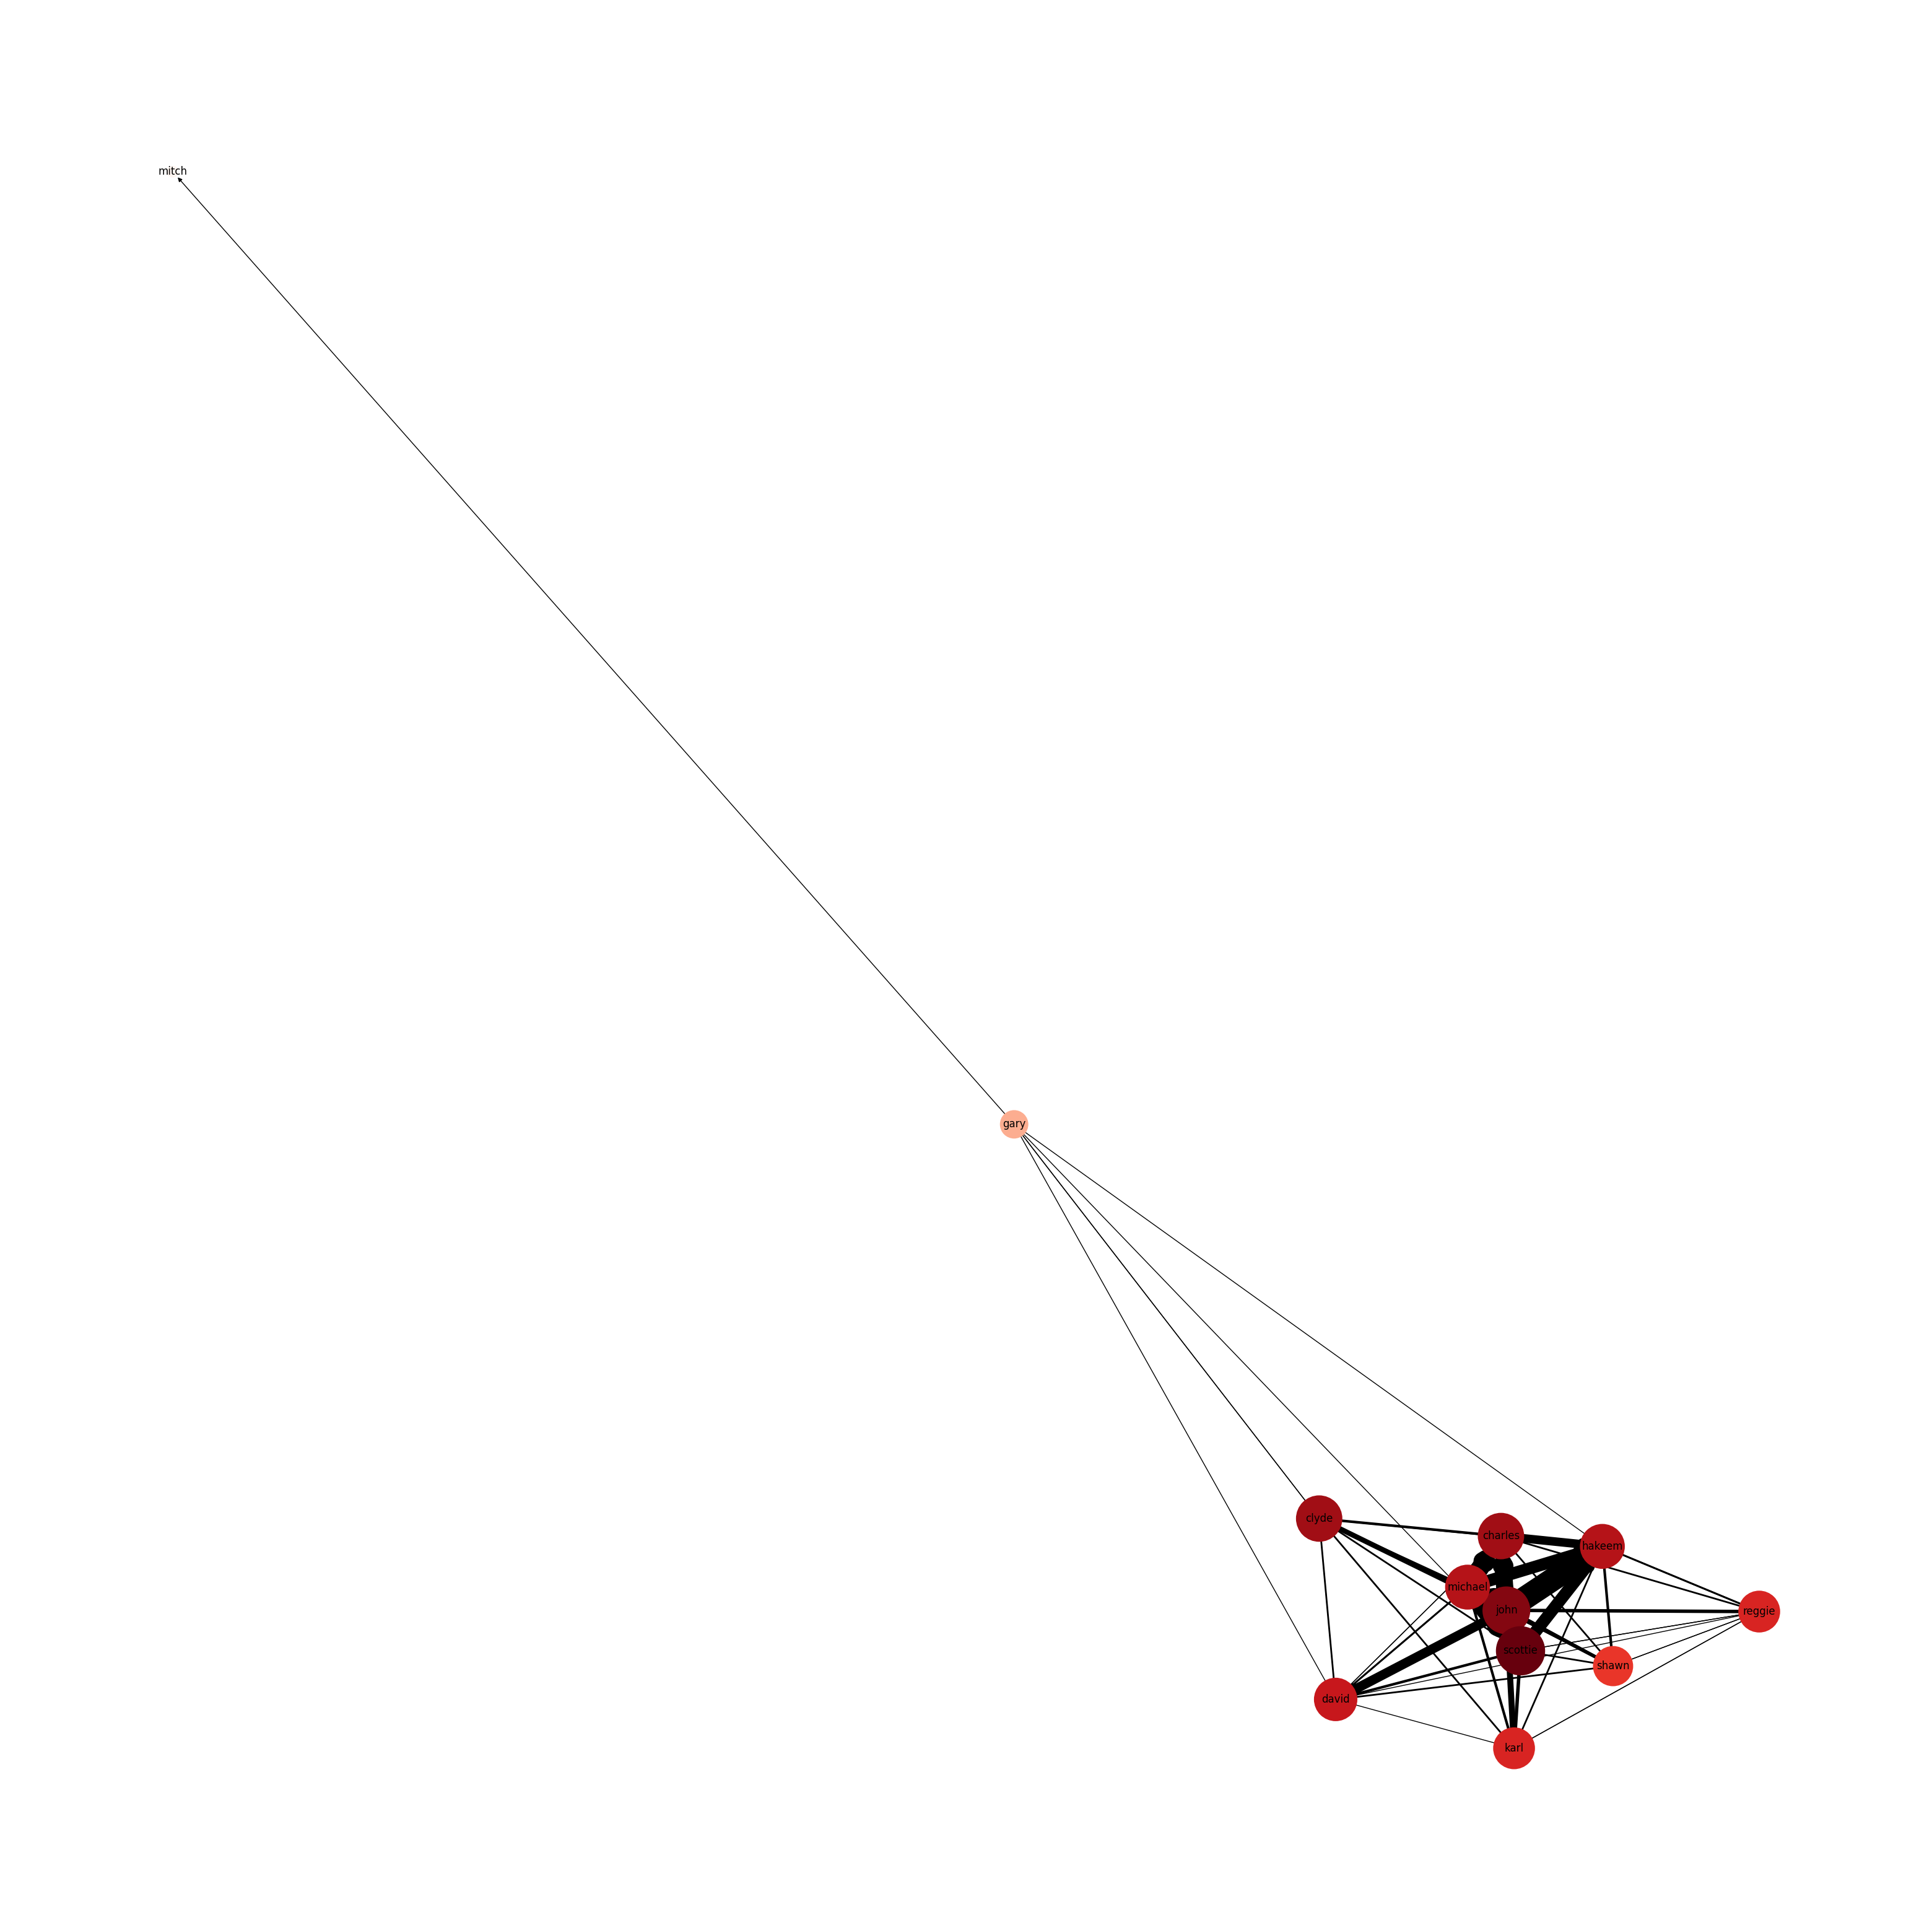

In [19]:
fig = plt.figure(figsize=(40,40))

# Set the colors of the nodes based on their degree centrality
node_colors = [centrality[n] for n in g.nodes()]

pos = nx.spring_layout(g)
nx.draw_networkx_edges(g, pos, width=weights)
nx.draw_networkx_nodes(g, pos, node_size=[centrality[n] * 2000 for n in g.nodes()],
                                          node_color=node_colors, cmap=plt.cm.Reds, edgecolors='none')
nx.draw_networkx_labels(g, pos)
plt.axis('off')
plt.show()

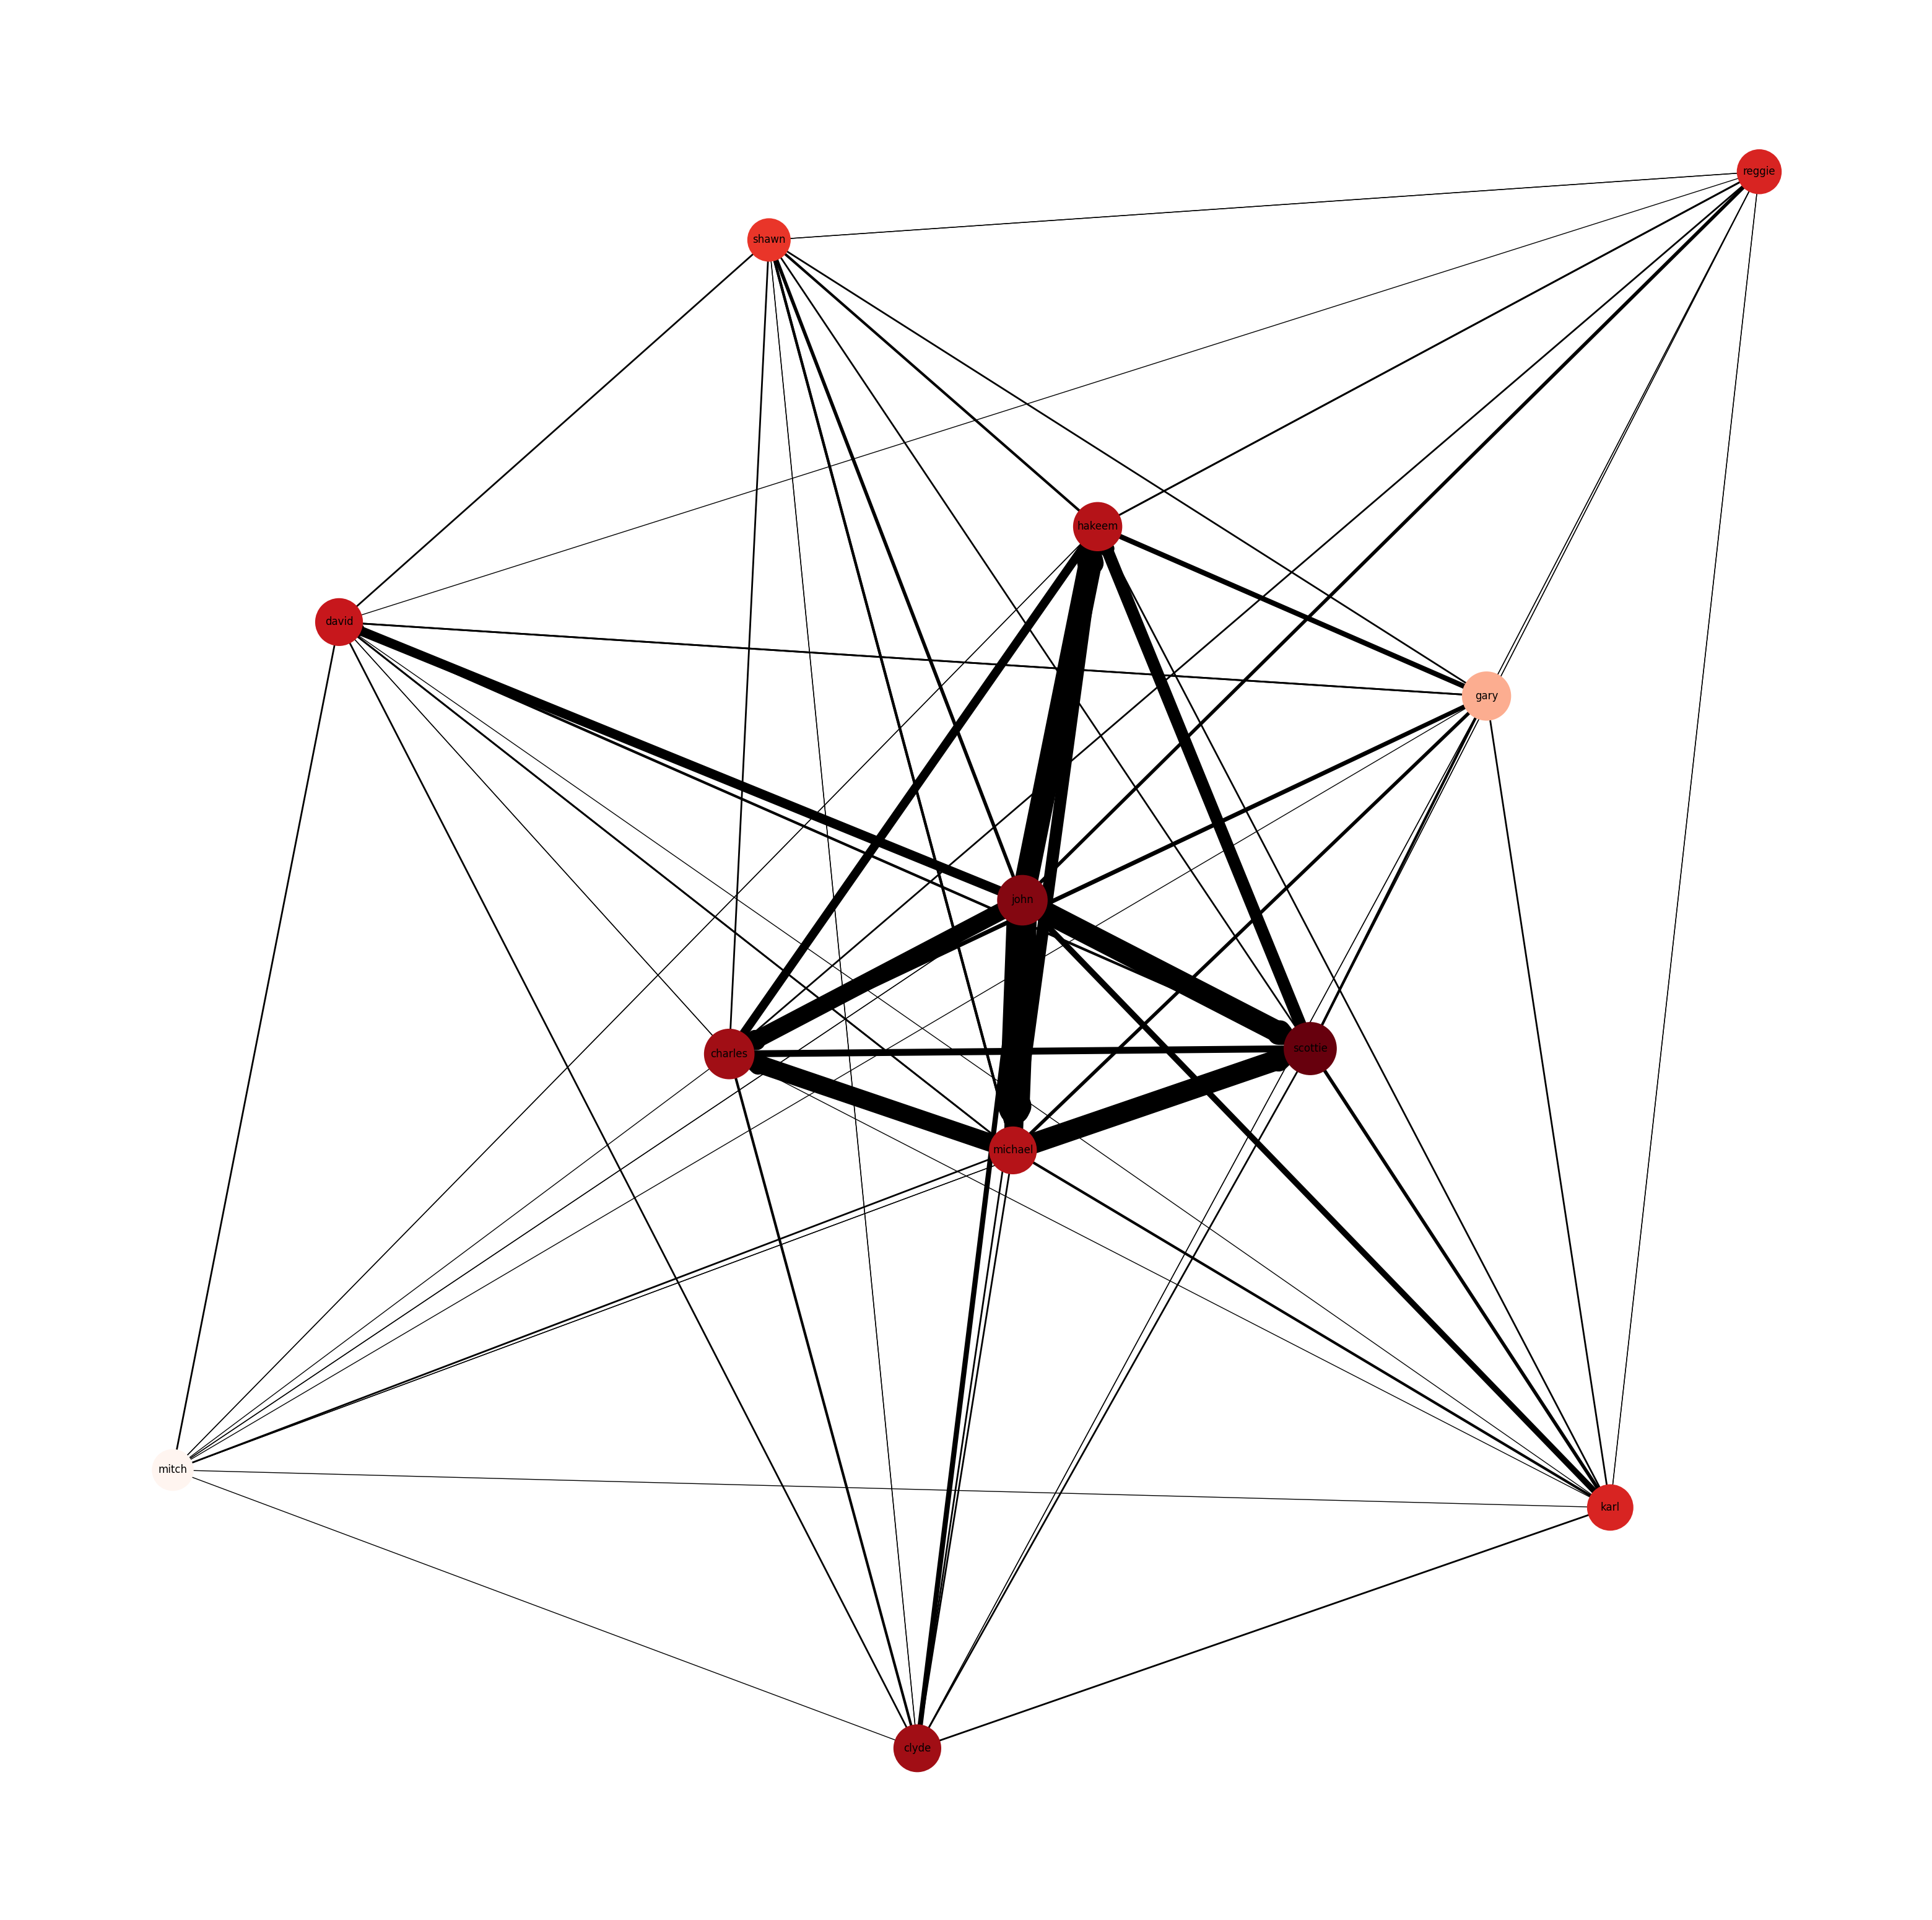

In [20]:
fig = plt.figure(figsize=(40,40))

# Set the colors of the nodes based on their degree centrality
node_colors = [centrality[n] for n in g2.nodes()]

pos = nx.spring_layout(g2)
nx.draw_networkx_edges(g2, pos, width=weights2)
nx.draw_networkx_nodes(g2, pos, node_size=[centrality2[n] * 2000 for n in g2.nodes()],
                                          node_color=node_colors, cmap=plt.cm.Reds, edgecolors='none')
nx.draw_networkx_labels(g2, pos)
plt.axis('off')
plt.show()

Circular layout의 네트워크를 그려봅니다. 노드를 원형으로 배치하는 형태입니다. 노드간의 연결을 확인하는데 좋습니다.

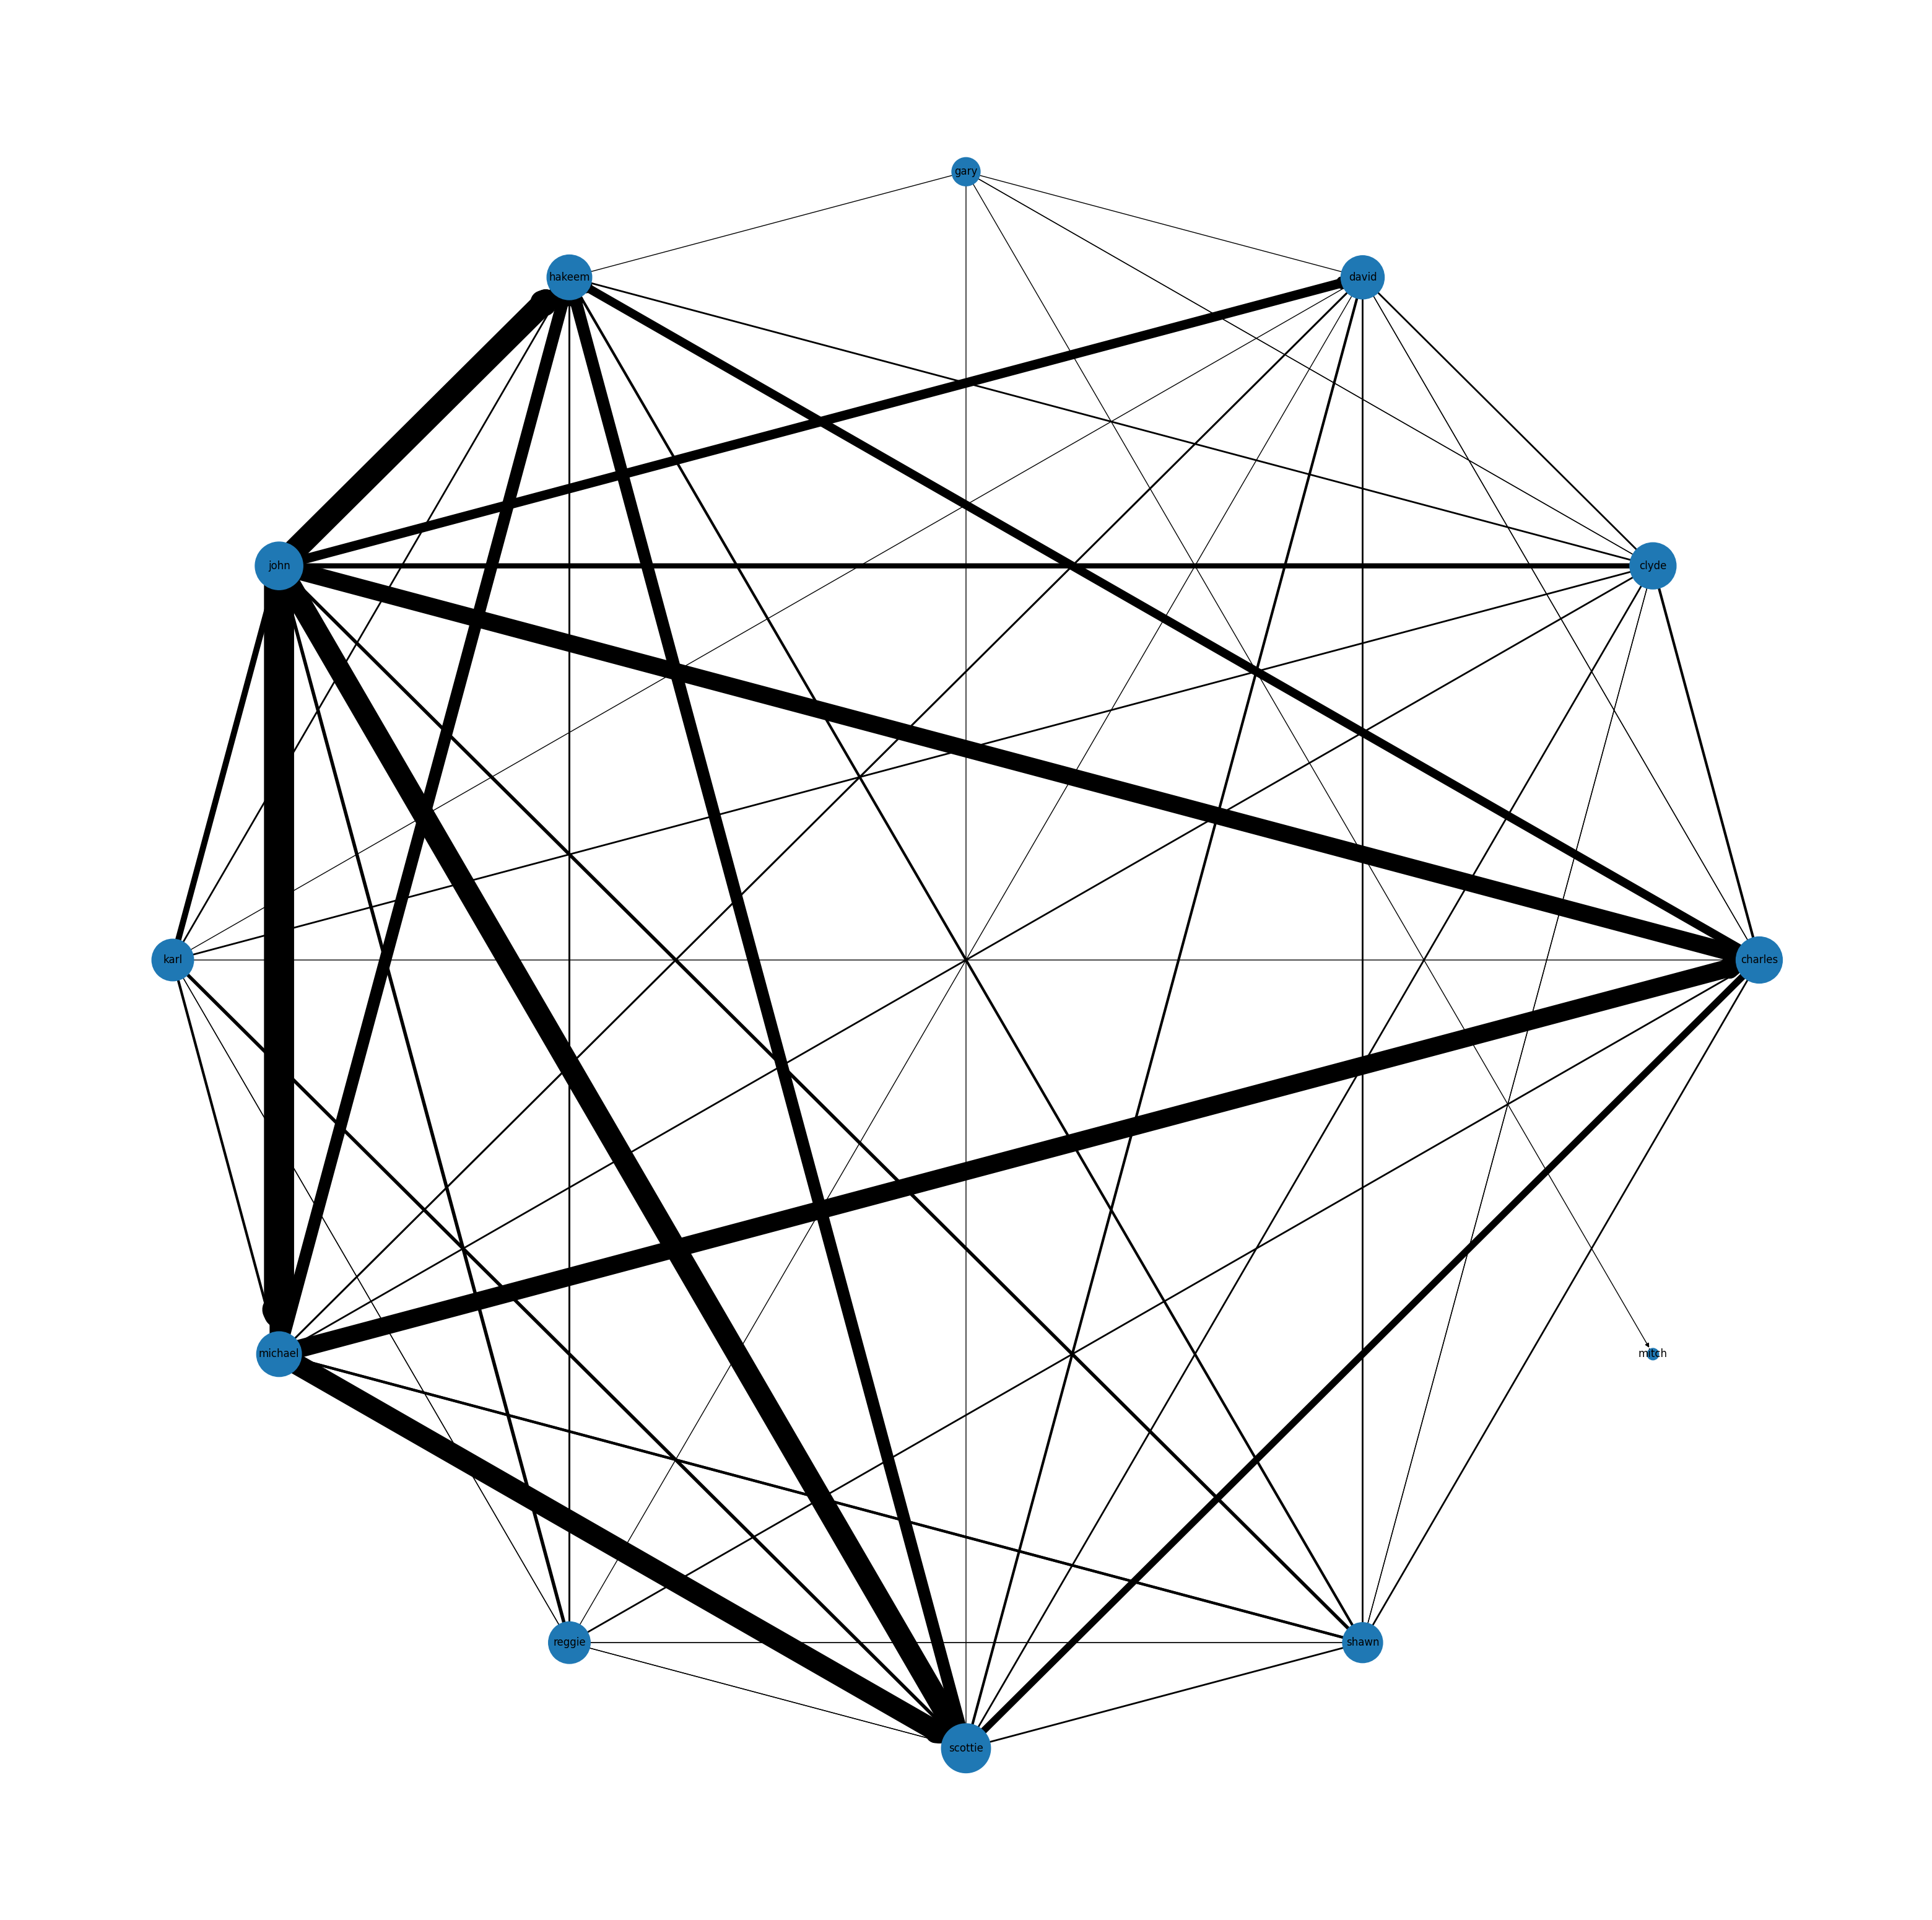

In [21]:
fig = plt.figure(figsize=(40,40))

pos2 = nx.circular_layout(g)
nx.draw_networkx_edges(g, pos2, width=weights)
nx.draw_networkx_nodes(g, pos2, node_size=[centrality[n] * 2000 for n in g.nodes()])
nx.draw_networkx_labels(g, pos2)
plt.axis('off')
plt.show()

Random layout은 노드와 엣지를 랜덤하게 배치합니다.

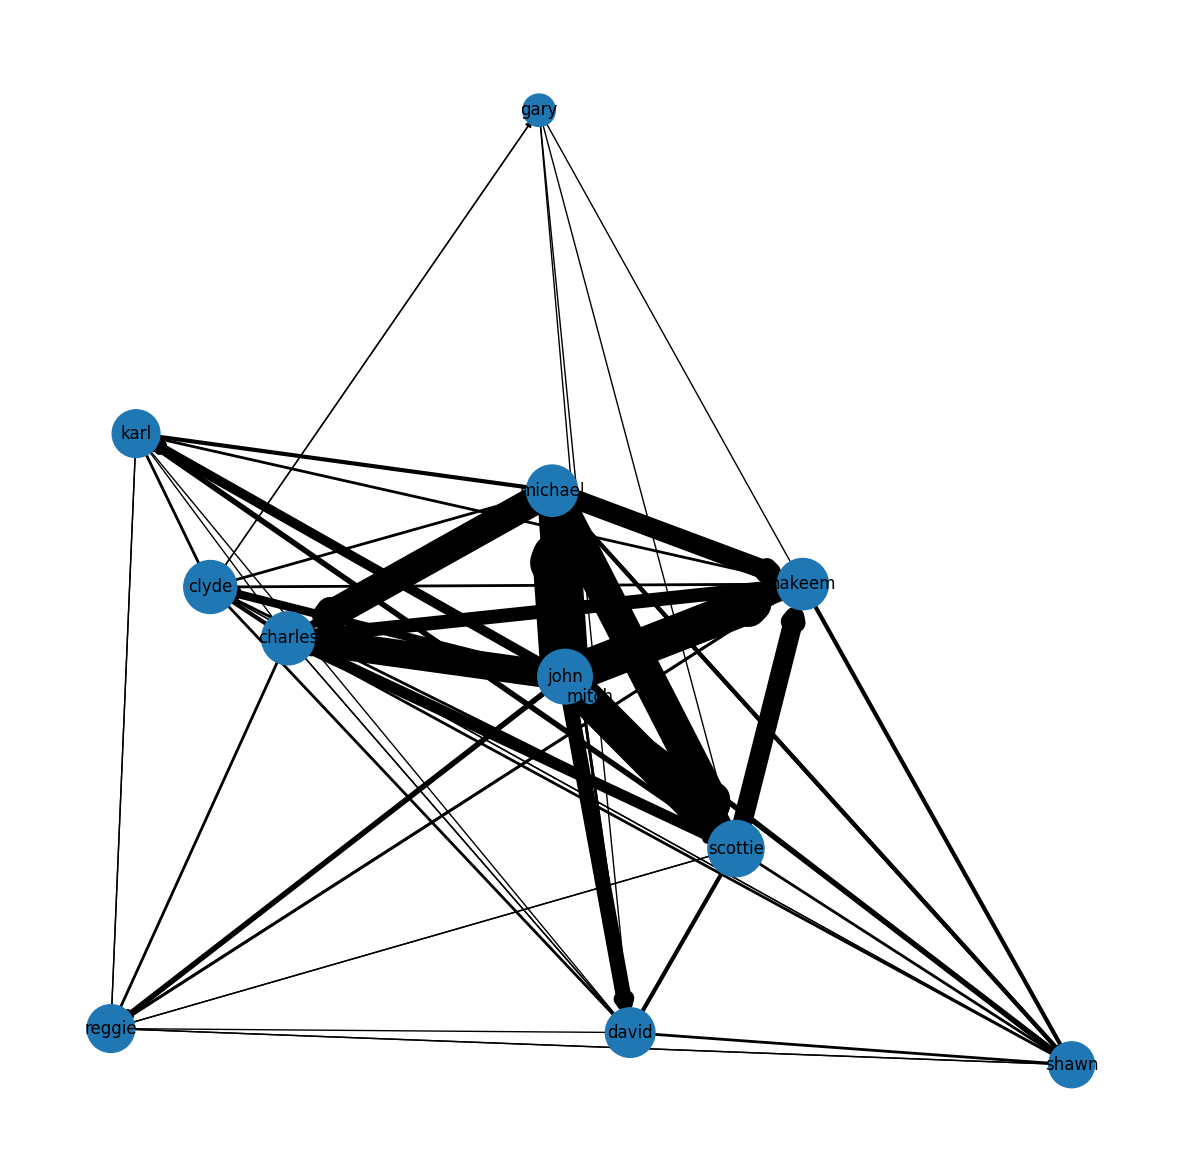

In [24]:
fig = plt.figure(figsize=(15,15))

pos3 = nx.random_layout(g)
nx.draw_networkx_edges(g, pos3, width=weights)
nx.draw_networkx_nodes(g, pos3, node_size=[centrality[n] * 1000 for n in g.nodes()])
nx.draw_networkx_labels(g, pos3)
plt.axis('off')
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,15))

pos4 = nx.shell_layout(g)
nx.draw_networkx_edges(g, pos4, width=weights)
nx.draw_networkx_nodes(g, pos4, node_size=[centrality[n] * 1000 for n in g.nodes()])
nx.draw_networkx_labels(g, pos4)
plt.axis('off')
plt.show()

Spectral layout은 노드의 eigenvalue를 이용하여 노드와 엣지를 배치합니다.

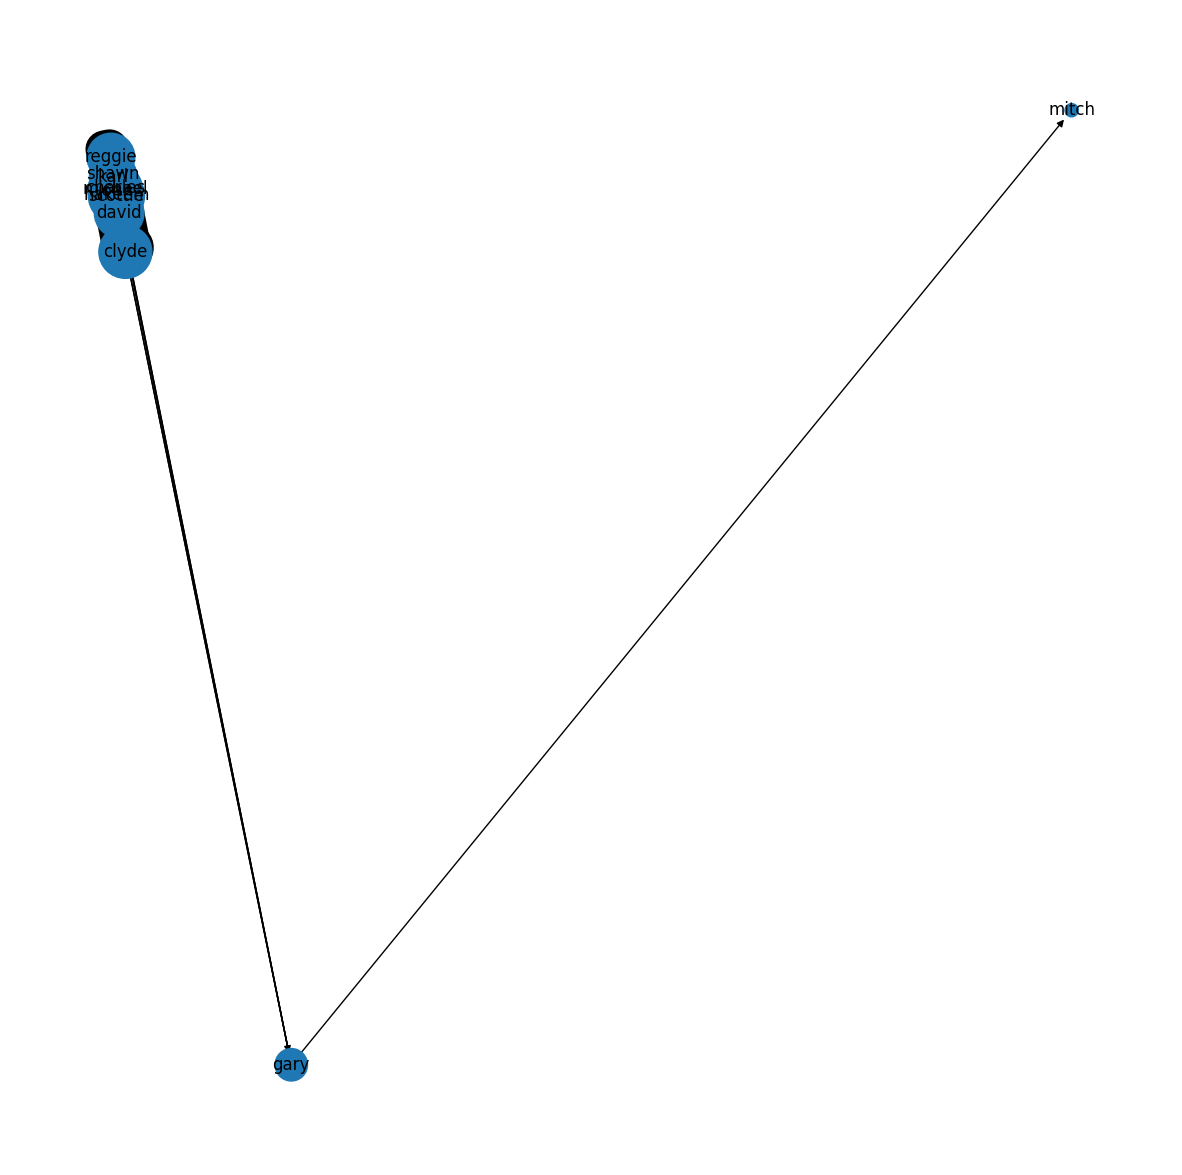

In [25]:
fig = plt.figure(figsize=(15,15))

pos5 = nx.spectral_layout(g)
nx.draw_networkx_edges(g, pos5, width=weights)
nx.draw_networkx_nodes(g, pos5, node_size=[centrality[n] * 1000 for n in g.nodes()])
nx.draw_networkx_labels(g, pos5)
plt.axis('off')
plt.show()

**SNA의 인덱스**

SNA는 노드의 중심성과 연결성, 그리고 네트워크의 구조를 나타내는 다양한 지표가 있습니다. 각 지표를 구하기 전에 우선 앞서 사용한 directed network인 passmap graph(g)와 함께 간단한 undirected graph(g2)를 만들어 보았습니다.

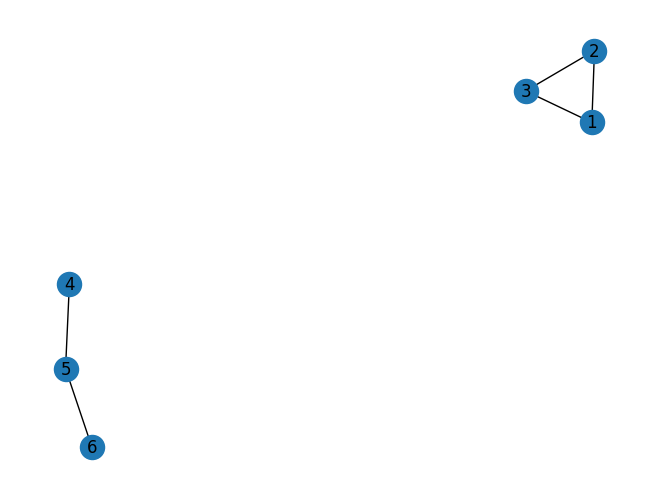

In [26]:
# create a graph undirected network
g2 = nx.Graph()

# add some edges to the graph
g2.add_edges_from([(1, 2), (2, 3), (3, 1), (4, 5), (5, 6)])
pos = nx.spring_layout(g2)
nx.draw(g2, pos)
nx.draw_networkx_labels(g2, pos)
plt.show()

네트워크의 노드의 특성은 보통 중심성(centrality)를 통해 측정합니다.\
우선 연결정도(degree)의 개념이 중요합니다. 연결정도란 각각의 노드가 몇개의 다른 노드와 연결되어 있는지, 총 연결관계의 갯수를 의미합니다.\
연결중심성(Degree centrality)는 노드의 degree를 통해 각 노드의 중심성을 측정합니다. 연결이 많을 수록 네트워크에서 중요한 역할을 하는 노드라고 가정할 때 값이 큰 노드가 중심적인 역할을 합니다.\
근접 중심성(Closeness centrality)이란 각 노드 간의 거리를 바탕으로 중심성을 측정하는 방식입니다. 연결정도 중심성은 직접 연결된 노드의 개수만을 파악한다면, 근접 중심성은 간접적으로 연결되어 있는 모든 노드간의 거리를 바탕으로 중심성을 측정합니다. 직접 연결되어 있는 사람들을 통해 접근할 수 있는 간접적인 노드 간의 관계까지 파악하며, 연결정도 중심성보다 넓은 범위에서 중심성을 측정하게 됩니다. 간접적인 중심성이 크다면, 핵심 노드와의 관계가 많다는 뜻으로 다수의 핵심 노드들과의 관계를 통해 해당 네트워크 내의 핵심 노드일 가능성이 높습니다.\
매개중심성(Betweenness centrality)은 네트워크 내에서 한 노드가 다른 노드들 사이에 위치하는 정도를 나타내는 지표입니다. 즉 네트워크 내에서 어디에 위치하는지를 파악함으로써 해당 노드의 영향력을 파악할 수 있습니다. 네트워크 내의 매개 중심성이 높은 노드는 다른 핵심 노드들 사이에서의 중재자(broker) 역할을 수행하게 되며 핵심 노드로서 기능할 가능성이 높습니다.

In [27]:
degrees = g2.degree()
print(degrees)
# indexes

# degrees
degrees = g2.degree()
print("Degree:")
for node in degrees:
    print(f"{node[0]}: {node[1]}")
print()

[(1, 2), (2, 2), (3, 2), (4, 1), (5, 2), (6, 1)]
Degree:
1: 2
2: 2
3: 2
4: 1
5: 2
6: 1



In [28]:
# degree centrality
degree_centrality = nx.degree_centrality(g)

# Sort the nodes by degree centrality in decreasing order
sorted_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)
print("Node:\tDegree Centrality")
for node in sorted_nodes:
    print(f"{node}: {degree_centrality[node]}")
print()

Node:	Degree Centrality
scottie: 1.6363636363636365
john: 1.5454545454545454
charles: 1.4545454545454546
clyde: 1.4545454545454546
hakeem: 1.3636363636363638
michael: 1.3636363636363638
david: 1.2727272727272727
karl: 1.1818181818181819
reggie: 1.1818181818181819
shawn: 1.0909090909090908
gary: 0.5454545454545454
mitch: 0.09090909090909091



In [29]:
# Calculate the closeness centrality of each node
closeness_centrality = nx.closeness_centrality(g2)
sorted_nodes = sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)
print("Node:\tCloseness Centrality")
for node in sorted_nodes:
    print(f"{node}: {closeness_centrality[node]}")
print()


Node:	Closeness Centrality
1: 0.4
2: 0.4
3: 0.4
5: 0.4
4: 0.26666666666666666
6: 0.26666666666666666



In [30]:
# Calculate the betweenness centrality of each node
betweenness_centrality = nx.betweenness_centrality(g)
sorted_nodes = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)
print("Node:\tBetweenness Centrality")
for node in sorted_nodes:
    print(f"{node}: {betweenness_centrality[node]}")
print()


Node:	Betweenness Centrality
clyde: 0.2000865800865801
gary: 0.09090909090909091
scottie: 0.03880952380952381
john: 0.029718614718614714
hakeem: 0.024567099567099564
charles: 0.0216017316017316
michael: 0.020541125541125537
reggie: 0.01872294372294372
david: 0.018506493506493506
karl: 0.013722943722943722
shawn: 0.013722943722943722
mitch: 0.0



In [31]:

# degree centrality
degree_centrality = nx.degree_centrality(g2)

# Sort the nodes by degree centrality in decreasing order
sorted_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)
print("Node:\tDegree Centrality")
for node in sorted_nodes:
    print(f"{node}: {degree_centrality[node]}")
print()




Node:	Degree Centrality
1: 0.4
2: 0.4
3: 0.4
5: 0.4
4: 0.2
6: 0.2



Directed graph의 경우에는 in-degree 와 out_degree를 구분하여야 합니다. in-degree는 노드를 중심으로 들어오는 연결을 의미하며 out-degree는 나가는 연결을 의미합니다.


In [32]:
# in/out-degree
in_degrees = g.in_degree()
out_degrees = g.out_degree()

# Print the in-degree and out-degree of each node
print("In-degree:")
for node in in_degrees:
    print(f"{node[0]}: {node[1]}")
print()
print("Out-degree:")
for node in out_degrees:
    print(f"{node[0]}: {node[1]}")
print()

In-degree:
charles: 8
clyde: 9
david: 8
gary: 1
hakeem: 9
john: 8
karl: 6
michael: 7
reggie: 7
scottie: 10
shawn: 4
mitch: 1

Out-degree:
charles: 8
clyde: 7
david: 6
gary: 5
hakeem: 6
john: 9
karl: 7
michael: 8
reggie: 6
scottie: 8
shawn: 8
mitch: 0



In [33]:
# degree and in/out-degree centrality
degree_centrality = nx.degree_centrality(g)
indegree_centrality = nx.in_degree_centrality(g)
outdegree_centrality = nx.out_degree_centrality(g)
# Sort the nodes by degree centrality in decreasing order
sorted_nodes_deg = sorted(degree_centrality, key=degree_centrality.get, reverse=True)
sorted_nodes_indeg = sorted(indegree_centrality, key=indegree_centrality.get, reverse=True)
sorted_nodes_outdeg = sorted(outdegree_centrality, key=outdegree_centrality.get, reverse=True)
print("Node:\tDegree Centrality")
for node in sorted_nodes_deg:
    print(f"{node}: {degree_centrality[node]}")
print()
print("Node:\tIn-Degree Centrality")
for node in sorted_nodes_indeg:
    print(f"{node}: {indegree_centrality[node]}")
print()
print("Node:\tOut-Degree Centrality")
for node in sorted_nodes_outdeg:
    print(f"{node}: {outdegree_centrality[node]}")
print()

Node:	Degree Centrality
scottie: 1.6363636363636365
john: 1.5454545454545454
charles: 1.4545454545454546
clyde: 1.4545454545454546
hakeem: 1.3636363636363638
michael: 1.3636363636363638
david: 1.2727272727272727
karl: 1.1818181818181819
reggie: 1.1818181818181819
shawn: 1.0909090909090908
gary: 0.5454545454545454
mitch: 0.09090909090909091

Node:	In-Degree Centrality
scottie: 0.9090909090909092
clyde: 0.8181818181818182
hakeem: 0.8181818181818182
charles: 0.7272727272727273
david: 0.7272727272727273
john: 0.7272727272727273
michael: 0.6363636363636364
reggie: 0.6363636363636364
karl: 0.5454545454545454
shawn: 0.36363636363636365
gary: 0.09090909090909091
mitch: 0.09090909090909091

Node:	Out-Degree Centrality
john: 0.8181818181818182
charles: 0.7272727272727273
michael: 0.7272727272727273
scottie: 0.7272727272727273
shawn: 0.7272727272727273
clyde: 0.6363636363636364
karl: 0.6363636363636364
david: 0.5454545454545454
hakeem: 0.5454545454545454
reggie: 0.5454545454545454
gary: 0.4545454

In [34]:
# Calculate the closeness centrality of each node
closeness_centrality = nx.closeness_centrality(g)
sorted_nodes = sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)
print("Node:\tCloseness Centrality")
for node in sorted_nodes:
    print(f"{node}: {closeness_centrality[node]}")
print()


Node:	Closeness Centrality
scottie: 0.9090909090909091
clyde: 0.8264462809917354
hakeem: 0.8264462809917354
charles: 0.7575757575757576
david: 0.7575757575757576
john: 0.7575757575757576
michael: 0.6993006993006993
reggie: 0.6993006993006993
karl: 0.6493506493506493
shawn: 0.5681818181818181
gary: 0.45454545454545453
mitch: 0.3548387096774194



In [35]:
# Calculate the betweenness centrality of each node
betweenness_centrality = nx.betweenness_centrality(g)
sorted_nodes = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)
print("Node:\tBetweenness Centrality")
for node in sorted_nodes:
    print(f"{node}: {betweenness_centrality[node]}")
print()

Node:	Betweenness Centrality
clyde: 0.2000865800865801
gary: 0.09090909090909091
scottie: 0.03880952380952381
john: 0.029718614718614714
hakeem: 0.024567099567099564
charles: 0.0216017316017316
michael: 0.020541125541125537
reggie: 0.01872294372294372
david: 0.018506493506493506
karl: 0.013722943722943722
shawn: 0.013722943722943722
mitch: 0.0



네트워크의 구조적 특징은 다양한 지표를 통해 측정할 수 있습니다.\
먼저 밀도(density)에 대해 알아보겠습니다. 밀도는 가능한 모든 연결 대비 얼마나 많은 연결이 있는지를 나타내는 지표입니다. 가능한 모든 연결이 있으면 1, 하나도 연결이 되어있지 않으면 0의 값을 가집니다. 밀도가 높을수록 다양한 연결이 이루어져 있다고 볼 수 있습니다.

In [36]:
# calculate the density of a network
density = nx.density(g)
print(f"Density: {density}")
print()

Density: 0.5909090909090909



그래프의 연결된 구성 요소(connected components)는 모든 노드 쌍 사이에 경로가 있는 부분그래프(subgraph)입니다. 그래프에는 연결된 구성 요소가 여러 개 있을 수 있으며 각 구성 요소는 최대 연결 부분그래프입니다. 연결된 구성 요소의 수는 그래프가 조각난 정도를 측정한 것입니다.

In [37]:
# get the connected components of the graph
components = list(nx.connected_components(g2))

# print the number of connected components and the nodes in each component
print(f"Number of Connected Components: {len(components)}")
for i, component in enumerate(components):
    print(f"Component {i+1}: {component}")

Number of Connected Components: 2
Component 1: {1, 2, 3}
Component 2: {4, 5, 6}


Directed graph의 경우에는 양방향이 모두 연결되어야 강하게 연결되었다고 합니다(Strongly connected components).

In [38]:
# get the strongly connected components of the graph
sccs = list(nx.strongly_connected_components(g))

# print the number of strongly connected components and the nodes in each component
print(f"Number of Strongly Connected Components: {len(sccs)}")
for i, scc in enumerate(sccs):
    print(f"SCC {i+1}: {scc}")

Number of Strongly Connected Components: 2
SCC 1: {'mitch'}
SCC 2: {'charles', 'clyde', 'karl', 'michael', 'shawn', 'hakeem', 'david', 'reggie', 'scottie', 'gary', 'john'}


그래프의 클러스터링 계수(Clustering Coefficient)는 노드가 얼마나 긴밀하게 연결되어 있는지를 측정한 것입니다. 노드의 클러스터링 계수는 노드가 참여할 수 있는 가능한 삼각형의 총 수에 대한 노드가 참여하는 삼각형 수의 비율로 정의됩니다. 그래프의 클러스터링 계수는 해당 노드의 클러스터링 계수의 평균입니다. 클러스터링 계수는 항상 0과 1 사이의 숫자입니다. 여기서 0은 완전히 클러스터링되지 않은 그래프를 나타내고 1은 완전히 클러스터링된 그래프를 나타냅니다.

In [39]:
# compute the clustering coefficient of the graph
clustering_coefficient = nx.average_clustering(g)
print(f"Clustering Coefficient of g: {clustering_coefficient}")
clustering_coefficient = nx.average_clustering(g2)
print(f"Clustering Coefficient of g2: {clustering_coefficient}")

Clustering Coefficient of g: 0.667249467517748
Clustering Coefficient of g2: 0.5


**과제**\
asoiaf-book1-edges.csv와 asoiaf-book1-nodes.csv는 소설 "얼음과 불의 노래" 1권 "The Game of Throne"의 등장인물간 상호작용을 조사한 결과 입니다. 이 파일을 분석하여 "The Game of Throne"의 등장인물을 네트워크분석하세요.\
자신만의 결과를 정리하여 짧은 리포트로 제출해주세요.